In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 

# Dados Coletados

A medida de $\Delta L$ que consta na tabela deve ser dividia por 10, uma vez que se o ponteiro maior do relógio marca 10, a leitura deve ser 0.1mm e não 1.0mm como estavamos realizando. Uma do ponteiro grande corresponde a 1.0mm.

In [13]:
#Dados coletados
l_0 = 438 #mm
delta_L = np.array([0,1.1,2.2,3.4,4.5,5.8]) #mm
delta_L = delta_L/10
#massa = [0,350,700,1050,1400,1750] #g
massa = np.array([0,349.87,700.3,1050.71,1400.99,1752.3]) #g
d_fio = np.array([0.31,0.31,0.31,0.315,0.32,0.315]) #mm


# Incertezas desses dados

In [14]:
#Incertezas dos equipamentos
inc_delta_L = 0.005 #mm metade da menor divisão do relógio
inc_massa = 0.03 #g #Confirmar com a professora
inc_l_0 = 0.5 #mm metade da menor divisão da régua
inc_d_fio = 0.01 #mm Informada na caixa do micrômetro

# Trasformando a massa e o diâmetro para o SI


In [15]:
massa = massa*1e-3#kg
print(massa)
inc_massa = inc_massa/1000 #kg


d_fio = d_fio/1000 #m
inc_d_fio = inc_d_fio/1000 #m

[0.      0.34987 0.7003  1.05071 1.40099 1.7523 ]


# Calculando a área e sua incerteza

$$S = \pi r^2 = \pi \left(\frac{d_{fio}}{2}\right)^2 = \frac{\pi d_{fio}^2}{4}$$

A incerteza pode ser obtida através da propagação de erro:

$$\sigma_S = \sqrt{\left(\sigma_{d_{fio}}\frac{dS}{d d_{fio}}\right)^2} = \bigg|\sigma_{d_{fio}}\frac{d}{d d_{fio}} \frac{\pi d_{fio}^2}{4}\bigg| = \sigma_{d_{fio}}\frac{\pi d}{2}$$

In [16]:
area = np.array(np.pi*np.power(d_fio,2)/2) #m^2

inc_area = inc_d_fio*np.pi*d_fio/2 #m^2
print(inc_area)

[4.86946861e-09 4.86946861e-09 4.86946861e-09 4.94800843e-09
 5.02654825e-09 4.94800843e-09]


# Calculando a força e sua incerteza

$$F = P = mg$$

A incerteza pode ser obtida através da propagação de erro da massa:

$$\sigma_F = \sqrt{\left(\sigma_{m}\frac{dS}{d m}\right)^2} = \bigg|\sigma_{m}\frac{d}{d m} mg\bigg| = \sigma_{m} g$$

In [17]:
g = 9.8 #m/s^2
forca = massa*g #N
inc_forca = inc_massa*g
print(forca)

[ 0.        3.428726  6.86294  10.296958 13.729702 17.17254 ]


# Calculando a tensão

Por definição:

$$T = \frac{F}{S}$$

A sua incerteza pode ser obtida através da propagação do erro da força e da área transversal do fio:

$$\sigma_T = \sqrt{\left(\sigma_F\frac{dT}{dF}\right)^2 + \left(\sigma_S\frac{dT}{dS}\right)^2} = \sqrt{\left(\sigma_F\frac{d}{dF}\frac{F}{S}\right)^2 + \left(\sigma_S\frac{d}{dS}\frac{F}{S}\right)^2} = \sqrt{\left(\frac{\sigma_F}{S}\right)^2 + \left(-\sigma_S\frac{F}{S^2}\right)^2} =\frac{F}{S}\sqrt{\left(\frac{\sigma_F}{F}\right)^2 + \left(\frac{\sigma_S}{S}\right)^2} =T\sqrt{\left(\frac{\sigma_F}{F}\right)^2 + \left(\frac{\sigma_S}{S}\right)^2} $$ 

In [18]:
tensao = np.array([0])
tensao = np.append(tensao,forca[1:]/area[1:]) #N/m^2

inc_tensao = tensao[1:]*np.sqrt(np.power(inc_forca/forca[1:],2) + np.power(inc_area[:1]/area[1:],2))
inc_tensao = np.append([0],inc_tensao)
print(tensao)
print(inc_tensao)

[0.00000000e+00 2.27137853e+07 4.54639261e+07 6.60644702e+07
 8.53574195e+07 1.10177662e+08]
[      0.          732705.33955074 1466579.55530416 2063995.39654072
 2584063.15233728 3442184.96638524]


# Calculando a deformação unitária e sua incerteza:

$$\frac{\Delta L}{L_0}$$

A sua incerteza pode ser obtida através da propagação de erro de $\Delta L$ e $L_0$

$$\sigma_{\frac{\Delta L}{L_0}} = \sqrt{\left(\sigma_{\Delta L}\frac{d}{d\Delta L}\frac{\Delta L}{L_0}\right)^2 + \left(\sigma_{L_0}\frac{d}{dL_0}\frac{\Delta L}{L_0}\right)^2} = \sqrt{\left(\frac{\sigma_{\Delta L}}{L_0}\right)^2 + \left(-\sigma_{L_0}\frac{\Delta L}{L_0^2}\right)^2} = \frac{\Delta L}{L_0}\sqrt{\left(\frac{\sigma_{\Delta L}}{\Delta L}\right)^2 + \left(\frac{\sigma_{L_0}}{L_0}\right)^2}$$

Para o caso de deformação unitária nula devemos ter cuidado para que o computador não realize divisões por $0$. Tendo isso em vista, nesse caso utilizaremos que:

$$\sigma_{\frac{\Delta L}{L_0}} = \sqrt{\left(\frac{\sigma_{\Delta L}}{L_0}\right)^2 + \left(\sigma_{L_0}\frac{\Delta L}{L_0^2}\right)^2} $$

Como $\Delta L = 0$:

$$\sigma_{\frac{\Delta L}{L_0}} = \frac{\sigma_{\Delta L}}{L_0}$$

In [19]:
def_unit = delta_L/l_0

inc_def_unit = def_unit[1:]*np.sqrt(np.power(inc_delta_L/delta_L[1:],2) + np.power(inc_l_0/l_0,2))

#O caso de deformação unitária nula deve ser calculado separado e o incluiremos no início do vetor:
inc_def_unit = np.append([inc_delta_L/l_0],inc_def_unit)
print(inc_def_unit)
print(def_unit)

[1.14155251e-05 1.14191246e-05 1.14299161e-05 1.14498669e-05
 1.14756150e-05 1.15151762e-05]
[0.         0.00025114 0.00050228 0.00077626 0.0010274  0.0013242 ]


# Gráfico dos dados brutos


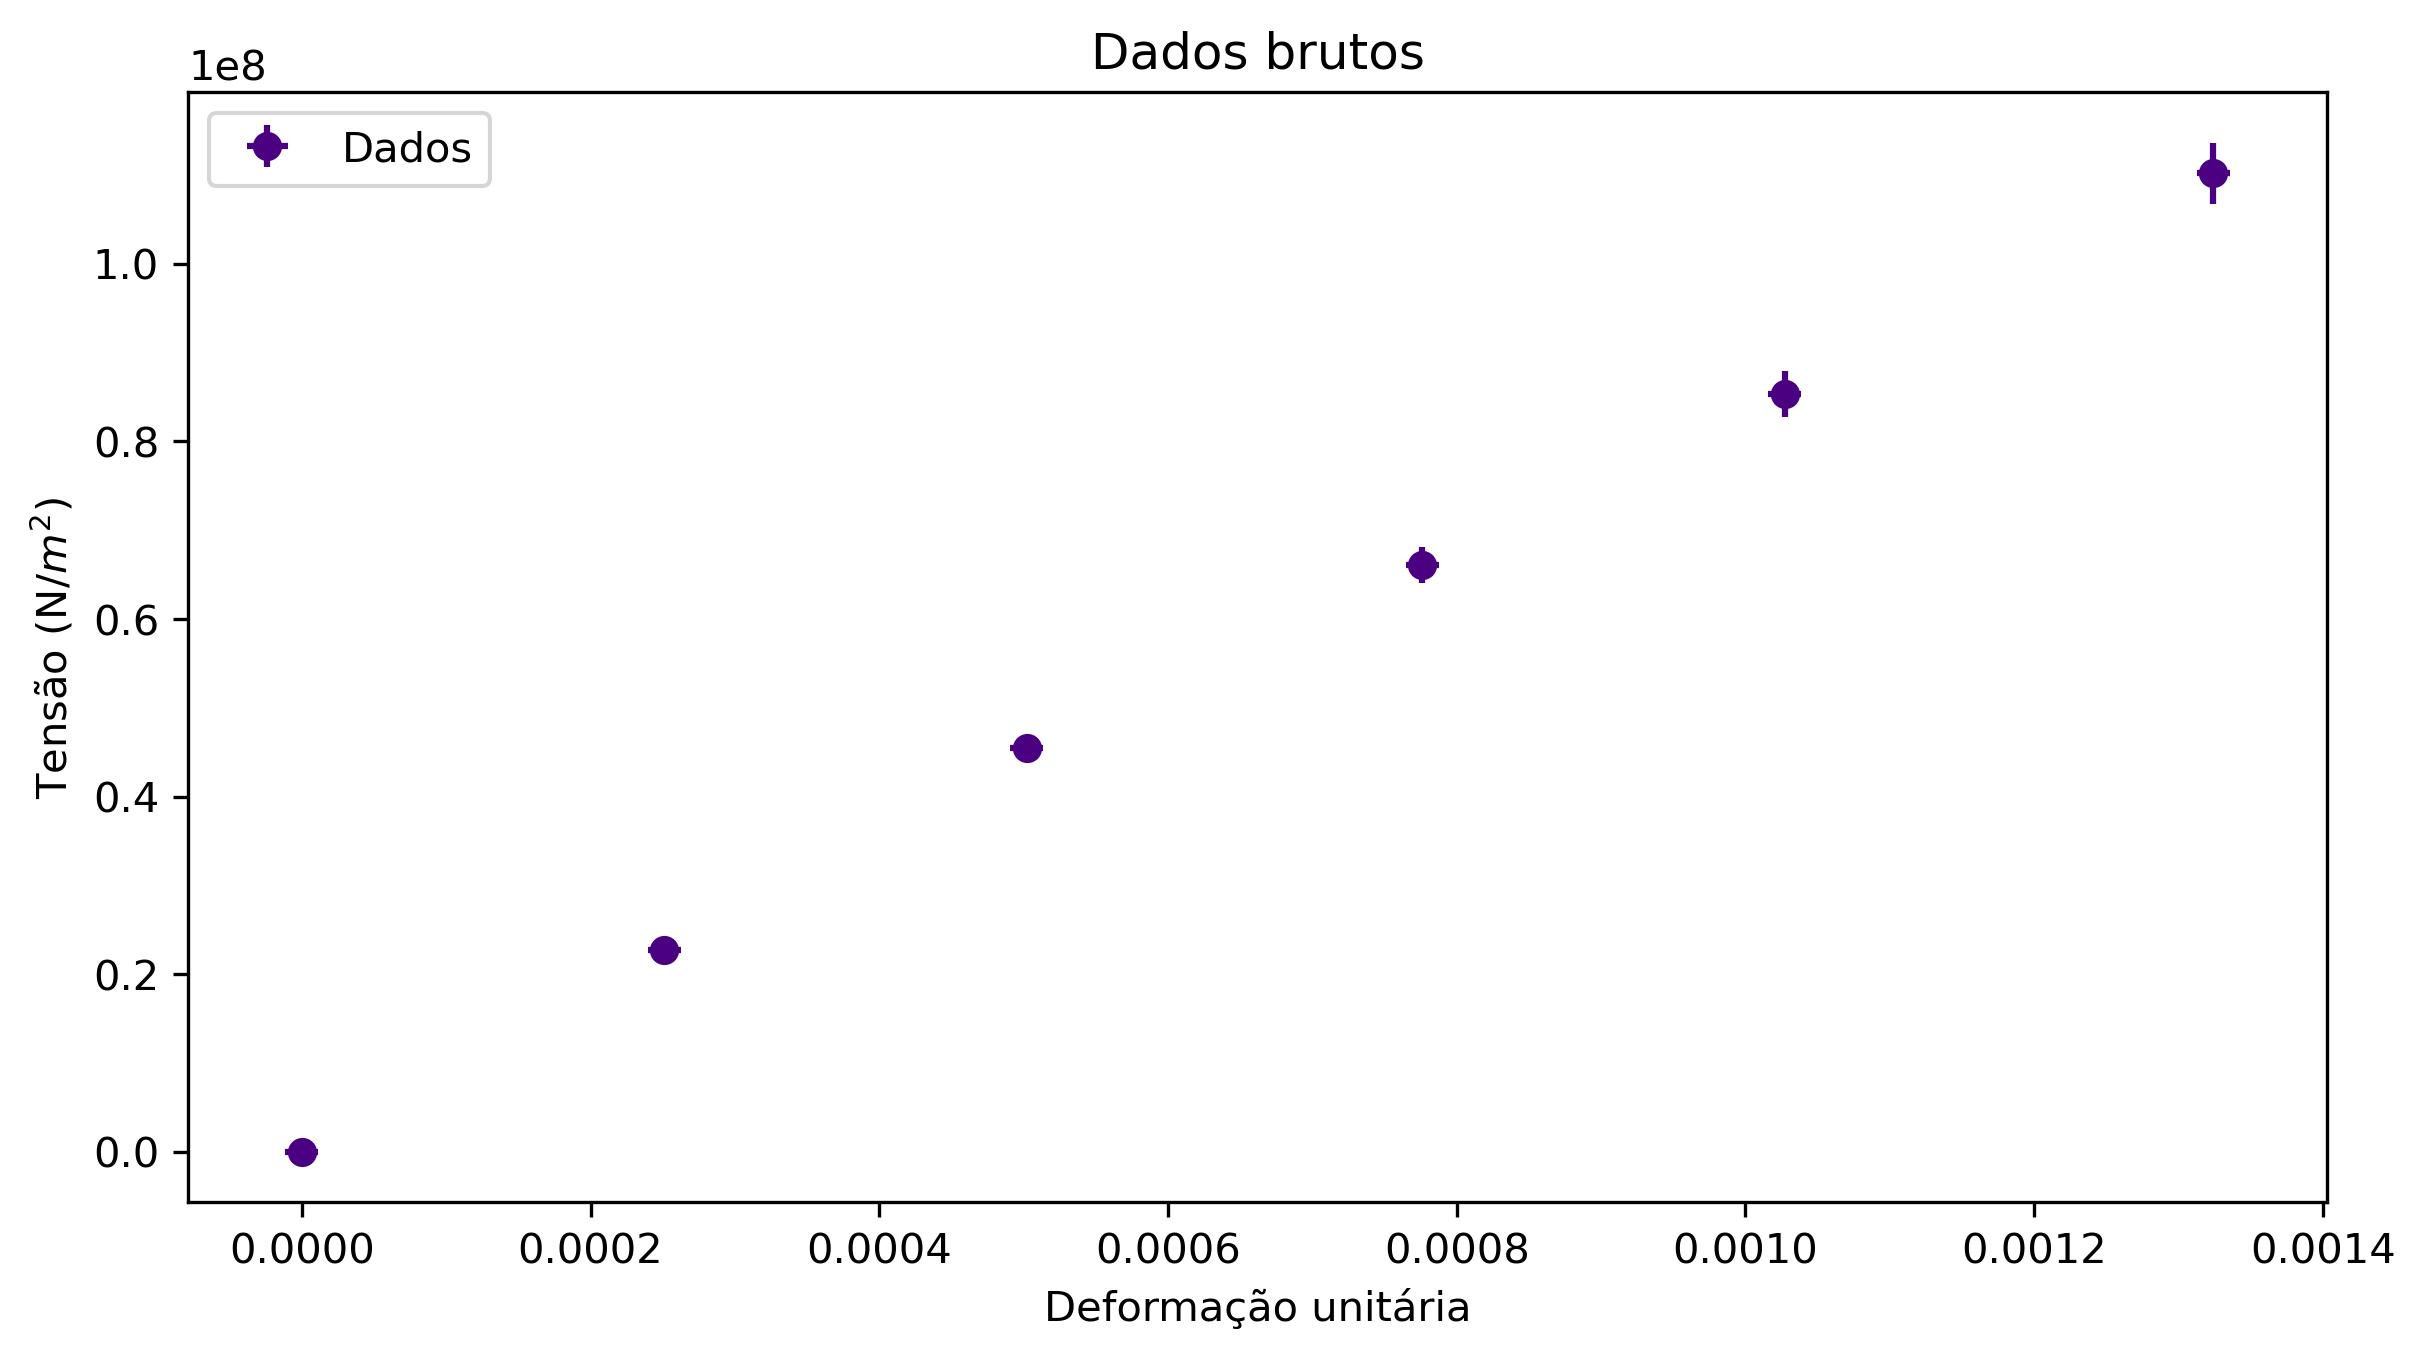

In [20]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(def_unit,tensao,inc_tensao,inc_def_unit, 'o', color = 'indigo', label = 'Dados')
plt.xlabel('Deformação unitária')
plt.ylabel(r'Tensão (N/$m^2$)')
plt.title('Dados brutos')
plt.legend()
#plt.savefig('FxI_brutos.pdf', dpi =300)
plt.show()

# Transferência de incerteza da deformação unitária para a tensão:

Nosso modelo teórico é dado por:

$$T = Y \ \frac{\Delta L}{L_0}$$

Portanto, a transferência de incerteza é dada por:

$$\sigma'_T = \sqrt{\sigma_T^2 + \left(\sigma_{\frac{\Delta L}{L_0}}\frac{dT}{d\frac{\Delta L}{L_0}}\right)^2}  $$

Aqui $\frac{dT}{d\frac{\Delta L}{L_0}}$ pode ser aproximado como o coeficiente angular da reta ajustada sobre os dados brutos.

In [21]:
#Realizando o fit sobre os dados brutos:

fit = np.polyfit(def_unit, tensao,1)

#Calculando a transferência de incerteza:
inc_tensao_transf = np.sqrt(np.power(inc_tensao,2) + np.power(inc_def_unit*fit[0],2))
print(inc_tensao_transf)

[ 939417.67519487 1191603.66636207 1742293.78089805 2268898.47834069
 2751218.49155777 3570240.56858051]


# Calculando o ajuste através do método dos mínimos quadrados:

In [22]:
fitpars, cov_pars = np.polyfit(def_unit,tensao,1,w=np.power(inc_tensao_transf,-1),cov='True')
poly1d_fn = np.poly1d(fitpars) 
#print(fitpars, cov_pars)

#Coeficientes da reta ajustada:
coef_angular = fitpars[0]
coef_linear = fitpars[1]
sigma_angular = np.sqrt(cov_pars[0][0])
sigma_linear = np.sqrt(cov_pars[1][1])


#Arredondando a incerteza:
sigma_angular = float('{:g}'.format(float('{:.2g}'.format(sigma_angular))))
sigma_linear = float('{:g}'.format(float('{:.2g}'.format(sigma_linear))))

                     
print('Coeficiente angular: %.1f +- %.1f (GN/m^2)' % (coef_angular /1e9,sigma_angular/1e9))
print('Coeficiente linear: %.5f +- %.5f (GN/m^2)' %(coef_linear/1e9,sigma_linear/1e9))

Coeficiente angular: 84.3 +- 1.8 (GN/m^2)
Coeficiente linear: 0.00076 +- 0.00079 (GN/m^2)


# O módulo de Young

Como o coeficiente linear é muito pequeno em relação ao produto do coeficiente linear e a deformação unitária, podemos assumir que nosso fit é aproximadamente:

$$T_{fit} = 84.3 \ \frac{\Delta L}{L_0}$$

Comparando com o modelo teórico, $T = Y \ \frac{\Delta L}{L_0}$, vemos que o módulo de Young é o coeficiente angular do nosso fit. Logo:

$$Y = (84.3 \pm 1.8) \  \ [G N/m^2] $$

Lembrando que o prefixo $G$ na unidade corresponde a $10^9$.

# Gráfico do ajuste

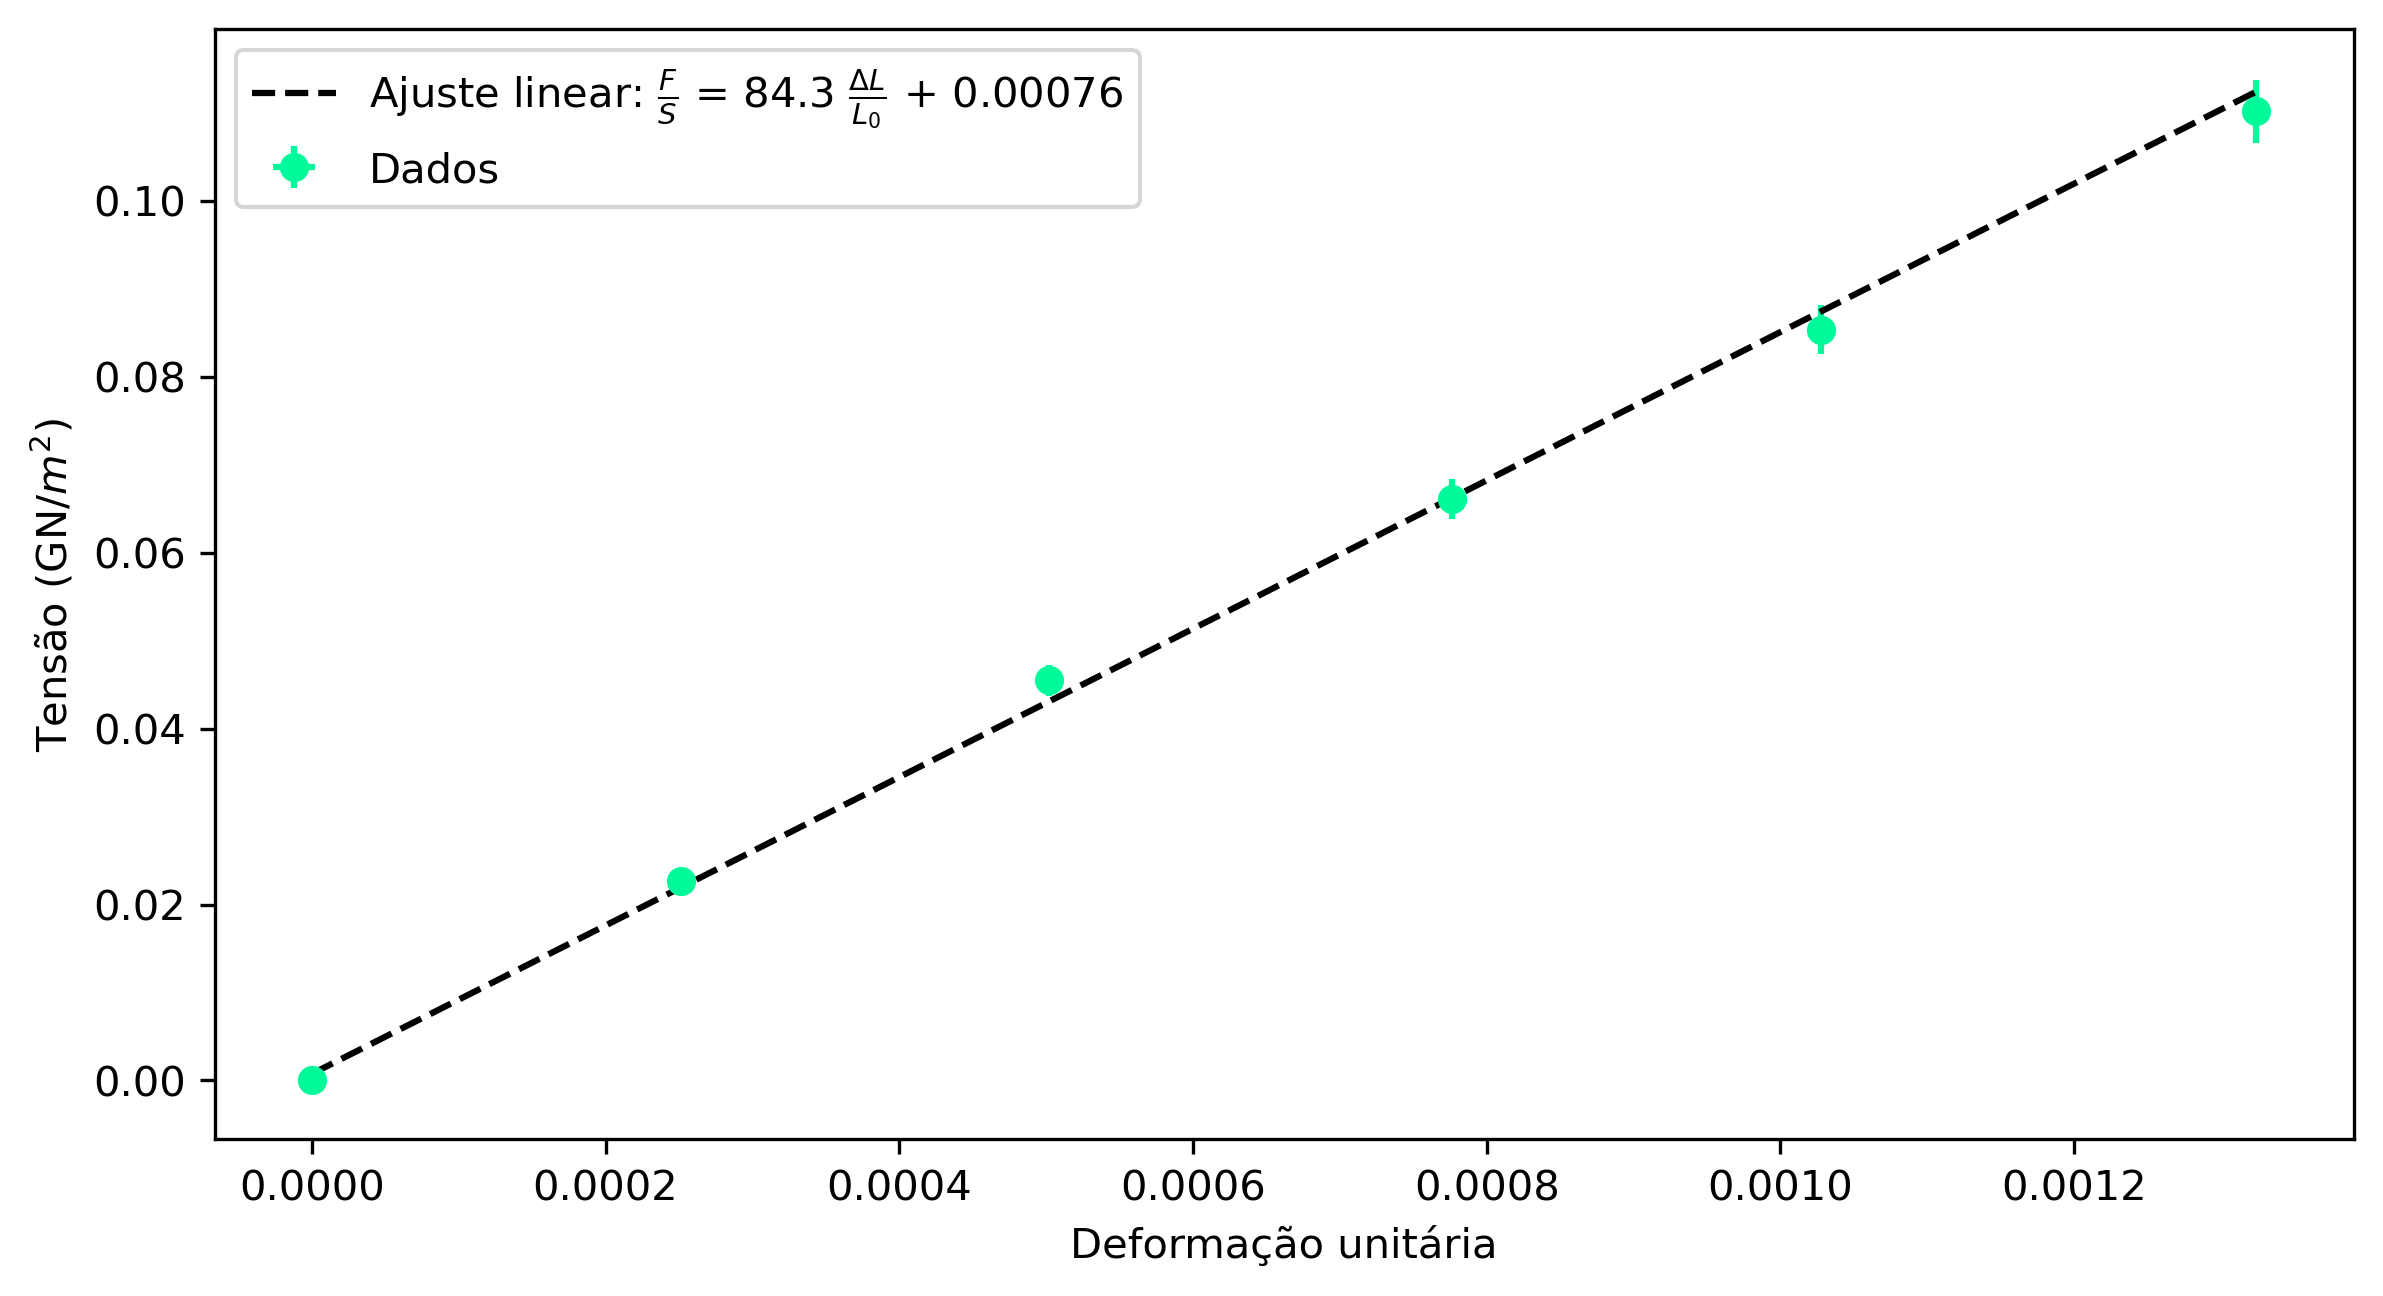

In [23]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(def_unit,tensao/1e9,inc_tensao_transf/1e9,0, 'o', color = 'Mediumspringgreen', label = 'Dados')
plt.plot(def_unit,def_unit*coef_angular/1e9 + coef_linear/1e9, color ='black', ls = '--', label = r'Ajuste linear: $\frac{F}{S}$ = %.1f $\frac{\Delta L}{L_0}$ + %.5f' % (coef_angular/1e9,abs(coef_linear/1e9)))
plt.xlabel('Deformação unitária')
plt.ylabel(r'Tensão (GN/$m^2$)')
plt.legend()
#plt.savefig('FxI_ajuste.pdf', dpi =300)
plt.show()